# Lab 3 - Data Storytelling

For this Lab you guys will be going through the thought-process of how Data Scientists in the real world extract, clean, explore and eventually visualize data to make inferences about real-world problems. Since this is a guided-lab it will be graded just as strictly since everything is provided to you.

**Note:** Please make sure you use the environment you guys created for Homework 2 - the one which contains Seaborn 0.9.0 - as it would be extremely difficult for you to make the same plots as in the blog post otherwise. Open the Homework 2 notebook if you are unsure on how to switch to that environment.

Once again - name the notebooks as Lab3_rollno.ipynb

Here are the links you have to follow for this lab (you HAVE to follow both links)

[Data Storytelling Part One](https://towardsdatascience.com/homicide-in-chicago-data-storytelling-part-one-e6fbd77afc07)

[Data Storytelling Part Two](https://towardsdatascience.com/homicide-in-chicago-data-stroytelling-part-two-e8748602daca)


## Part 1: Data Cleaning
All the plots in the blog-post should be printed in this part. Here all of you have the freedom to break up the cells as you wish - so that you also get practice in that regard.

In [1]:
# import modules
import numpy as np
import pandas as pd
from pandas import *
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from scipy import stats
sns.set_style("darkgrid")
import matplotlib.image as mpimg
from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
# use TextFileReader iterable with chunks of 100,000 rows.
tp = read_csv('Crimes_-_2001_to_present.csv', iterator=True, chunksize=100000)  
crime_data = concat(tp, ignore_index=True)  

# print data's shape
crime_data.shape
# Output:
#(6546899, 22)

(6751632, 22)

In [3]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6751632 entries, 0 to 6751631
Data columns (total 22 columns):
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1.0+ GB


In [4]:
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [5]:
# preview all crime variables in the "Primary Type" column

crimes = crime_data['Primary Type'].sort_values().unique()
crimes, len(crimes)

(array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
        'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
        'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
        'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
        'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
        'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
        'NON - CRIMINAL', 'NON-CRIMINAL',
        'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
        'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
        'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
        'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
        'STALKING', 'THEFT', 'WEAPONS VIOLATION'], dtype=object), 35)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,1,'All Crime Distribution per District')

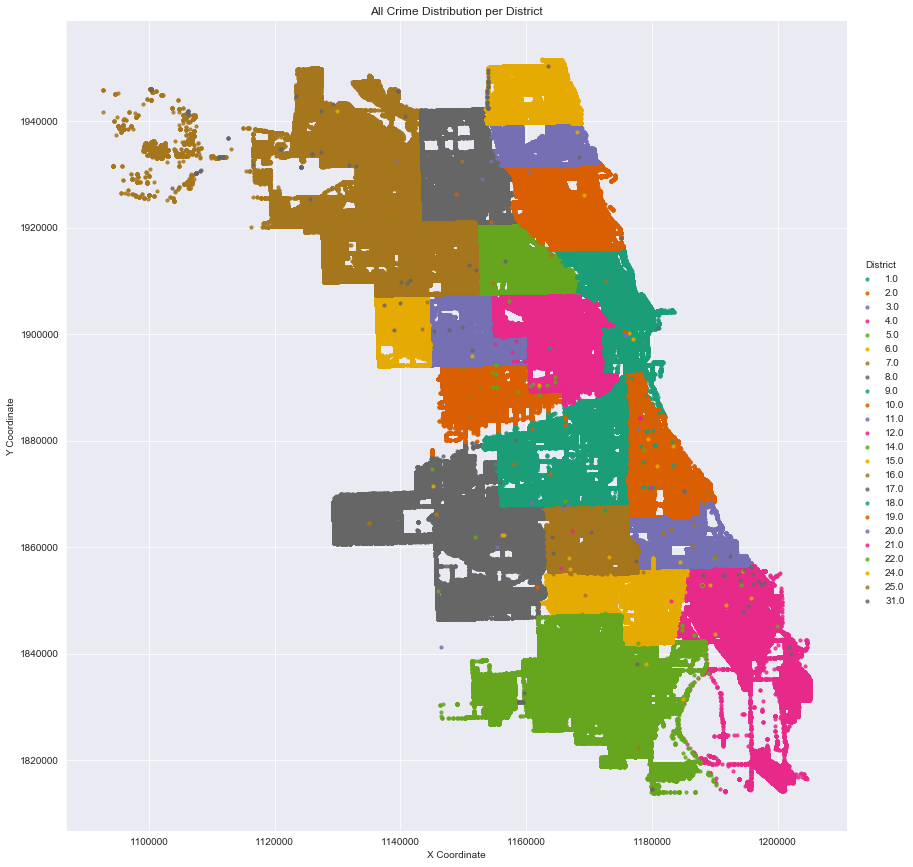

In [6]:
# Created a scatter plot of X and Y coordinates vs all crime data available in the dataset

crime_data = crime_data.loc[(crime_data['X Coordinate']!=0)]

sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=crime_data[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

In [59]:
# create and preview dataframe containing crimes associated with gang violence

col2 = ['Date','Primary Type','Arrest','Domestic','District','X Coordinate','Y Coordinate']
multiple_crimes = crime_data[col2]
multiple_crimes = multiple_crimes[multiple_crimes['Primary Type']\
                  .isin(['HOMICIDE','CONCEALED CARRY LICENSE VIOLATION','NARCOTICS','WEAPONS VIOLATION'])]

# clean some rouge (0,0) coordinates
multiple_crimes = multiple_crimes[multiple_crimes['X Coordinate']!=0]


multiple_crimes.head()

,Date,Primary Type,Arrest,Domestic,District,X Coordinate,Y Coordinate
8,03/18/2015 10:09:00 PM,NARCOTICS,True,False,9.0,1164279.0,1880656.0
12,03/18/2015 09:14:00 PM,WEAPONS VIOLATION,True,False,4.0,1197309.0,1848290.0
24,03/18/2015 09:44:00 PM,WEAPONS VIOLATION,True,False,15.0,1139051.0,1899715.0
36,03/19/2015 01:15:00 AM,NARCOTICS,True,False,10.0,1153173.0,1889153.0
42,03/19/2015 02:45:00 AM,NARCOTICS,True,False,11.0,1150409.0,1899258.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


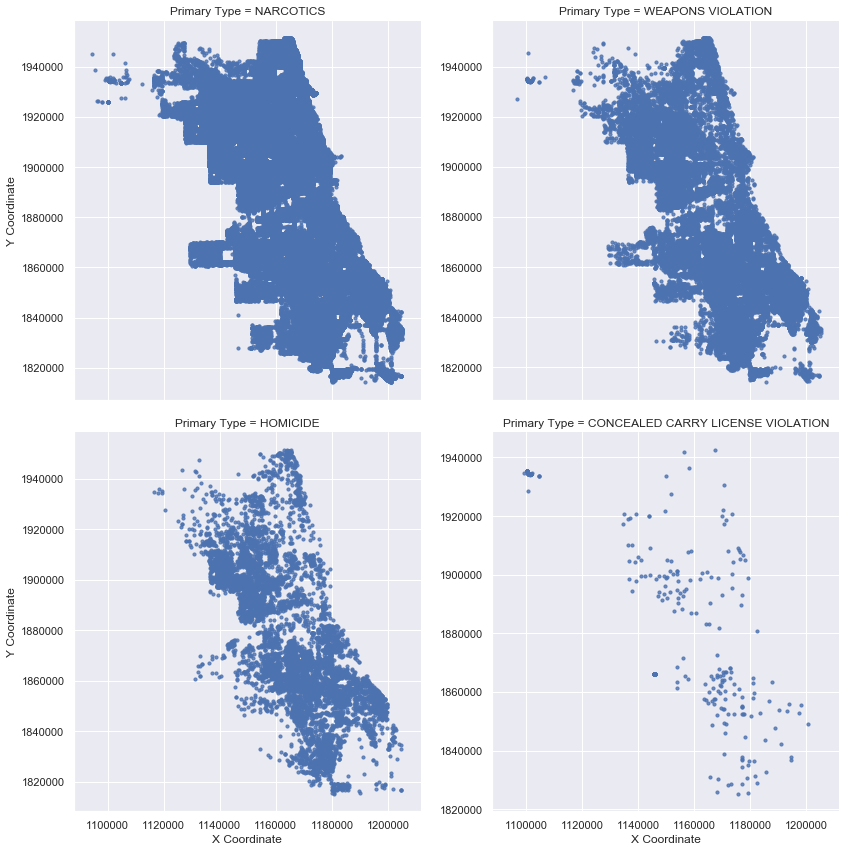

In [58]:
# geographical distribution scatter plots by crime
g = sns.lmplot(x="X Coordinate",
               y="Y Coordinate",
               col="Primary Type",
               data=multiple_crimes.dropna(), 
               col_wrap=2, size=6, fit_reg=False, 
               sharey=False,
               scatter_kws={"marker": "D",
                            "s": 10})

In [60]:
# create a dataframe with Homicide as the only crime

df_homicideN = crime_data[crime_data['Primary Type']=='HOMICIDE']
df_homicideN.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
638,4756,HP587530,09/22/2008 11:24:00 PM,047XX W GLADYS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,24.0,25.0,01A,1144818.0,1897935.0,2008,08/17/2015 03:03:40 PM,41.875943,-87.743748,"(41.875942734, -87.743748059)"
1241,4757,HP587531,09/22/2008 11:37:00 PM,022XX S KIRKLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,22.0,29.0,01A,1147705.0,1888660.0,2008,08/17/2015 03:03:40 PM,41.850436,-87.733386,"(41.850436084, -87.733385899)"
1786,4758,HP572693,09/23/2008 09:57:00 AM,027XX W POPE JOHN PAUL II DR,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,True,...,12.0,58.0,01A,1158655.0,1876028.0,2008,08/17/2015 03:03:40 PM,41.815555,-87.693543,"(41.815555438, -87.693542513)"
2282,4759,HP588309,09/23/2008 01:40:00 PM,056XX W 64TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,13.0,64.0,01A,1139888.0,1861562.0,2008,08/17/2015 03:03:40 PM,41.776221,-87.762736,"(41.776221083, -87.762736483)"
2895,4760,HP589244,09/23/2008 08:25:00 PM,088XX S PRAIRIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,6.0,44.0,01A,1179584.0,1846297.0,2008,08/17/2015 03:03:40 PM,41.733517,-87.617679,"(41.733517296, -87.617679154)"


In [61]:
# print some attributes of our new homicide dataframe

df_homicideN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9383 entries, 638 to 6751631
Data columns (total 22 columns):
ID                      9383 non-null int64
Case Number             9383 non-null object
Date                    9383 non-null object
Block                   9383 non-null object
IUCR                    9383 non-null object
Primary Type            9383 non-null object
Description             9383 non-null object
Location Description    9383 non-null object
Arrest                  9383 non-null bool
Domestic                9383 non-null bool
Beat                    9383 non-null int64
District                9383 non-null float64
Ward                    9050 non-null float64
Community Area          9050 non-null float64
FBI Code                9383 non-null object
X Coordinate            9380 non-null float64
Y Coordinate            9380 non-null float64
Year                    9383 non-null int64
Updated On              9383 non-null object
Latitude                9380 non-nu

In [62]:
# find null values in our dataframe

df_homicideN.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description      0
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                    333
Community Area          333
FBI Code                  0
X Coordinate              3
Y Coordinate              3
Year                      0
Updated On                0
Latitude                  3
Longitude                 3
Location                  3
dtype: int64

In [12]:
# drop null values and confirm

df_homicide = df_homicideN.dropna()
df_homicide.isnull().sum().sum()

0

In [13]:
# create a list of columns to keep and update the dataframe with new columns

keep_cols = ['Year','Date','Primary Type','Arrest','Domestic','District','Location Description',
             'FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude','Location']

df_homicide = df_homicide[keep_cols].reset_index()
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,638,2008,09/22/2008 11:24:00 PM,HOMICIDE,False,False,11.0,STREET,01A,1144818.0,1897935.0,41.875943,-87.743748,"(41.875942734, -87.743748059)"
1,1241,2008,09/22/2008 11:37:00 PM,HOMICIDE,False,False,10.0,STREET,01A,1147705.0,1888660.0,41.850436,-87.733386,"(41.850436084, -87.733385899)"
2,1786,2008,09/23/2008 09:57:00 AM,HOMICIDE,True,True,9.0,HOUSE,01A,1158655.0,1876028.0,41.815555,-87.693543,"(41.815555438, -87.693542513)"
3,2282,2008,09/23/2008 01:40:00 PM,HOMICIDE,False,False,8.0,ALLEY,01A,1139888.0,1861562.0,41.776221,-87.762736,"(41.776221083, -87.762736483)"
4,2895,2008,09/23/2008 08:25:00 PM,HOMICIDE,False,False,6.0,ALLEY,01A,1179584.0,1846297.0,41.733517,-87.617679,"(41.733517296, -87.617679154)"


In [14]:
# change string Date to datetime.datetime format

df_homicide['Date'] = df_homicide['Date'].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,638,2008,2008-09-22 23:24:00,HOMICIDE,False,False,11.0,STREET,01A,1144818.0,1897935.0,41.875943,-87.743748,"(41.875942734, -87.743748059)"
1,1241,2008,2008-09-22 23:37:00,HOMICIDE,False,False,10.0,STREET,01A,1147705.0,1888660.0,41.850436,-87.733386,"(41.850436084, -87.733385899)"
2,1786,2008,2008-09-23 09:57:00,HOMICIDE,True,True,9.0,HOUSE,01A,1158655.0,1876028.0,41.815555,-87.693543,"(41.815555438, -87.693542513)"
3,2282,2008,2008-09-23 13:40:00,HOMICIDE,False,False,8.0,ALLEY,01A,1139888.0,1861562.0,41.776221,-87.762736,"(41.776221083, -87.762736483)"
4,2895,2008,2008-09-23 20:25:00,HOMICIDE,False,False,6.0,ALLEY,01A,1179584.0,1846297.0,41.733517,-87.617679,"(41.733517296, -87.617679154)"


In [15]:
# create new columns from date column -- Year, Month, Day, Hour, Minutes, DayOfWeek 

df_homicide['Year'] = df_homicide['Date'].dt.year
df_homicide['Month'] = df_homicide['Date'].dt.month
df_homicide['Day'] = df_homicide['Date'].dt.day
df_homicide['Weekday'] = df_homicide['Date'].dt.dayofweek
df_homicide['HourOfDay'] = df_homicide['Date'].dt.hour

df_homicide = df_homicide.sort_values('Date')
# print columns list and info

df_homicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9049 entries, 505 to 9048
Data columns (total 18 columns):
index                   9049 non-null int64
Year                    9049 non-null int64
Date                    9049 non-null datetime64[ns]
Primary Type            9049 non-null object
Arrest                  9049 non-null bool
Domestic                9049 non-null bool
District                9049 non-null float64
Location Description    9049 non-null object
FBI Code                9049 non-null object
X Coordinate            9049 non-null float64
Y Coordinate            9049 non-null float64
Latitude                9049 non-null float64
Longitude               9049 non-null float64
Location                9049 non-null object
Month                   9049 non-null int64
Day                     9049 non-null int64
Weekday                 9049 non-null int64
HourOfDay               9049 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(6), object(4)
memory usa

In [16]:
# save cleaned data to pickle file 
df_homicide.to_pickle('df_homicide.pkl') 
print('pickle size:', os.stat('df_homicide.pkl').st_size)
# load pickled data 
df_homicide = pd.read_pickle('df_homicide.pkl')

pickle size: 1359479


## Part 2: Data Exploration and Visualization
Make sure ALL plots are printed just like in the blog-post. Although you can of course add details of your own if you wish and carry out some exploration on your own.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,1,'All Homicides (2001-2018) per District')

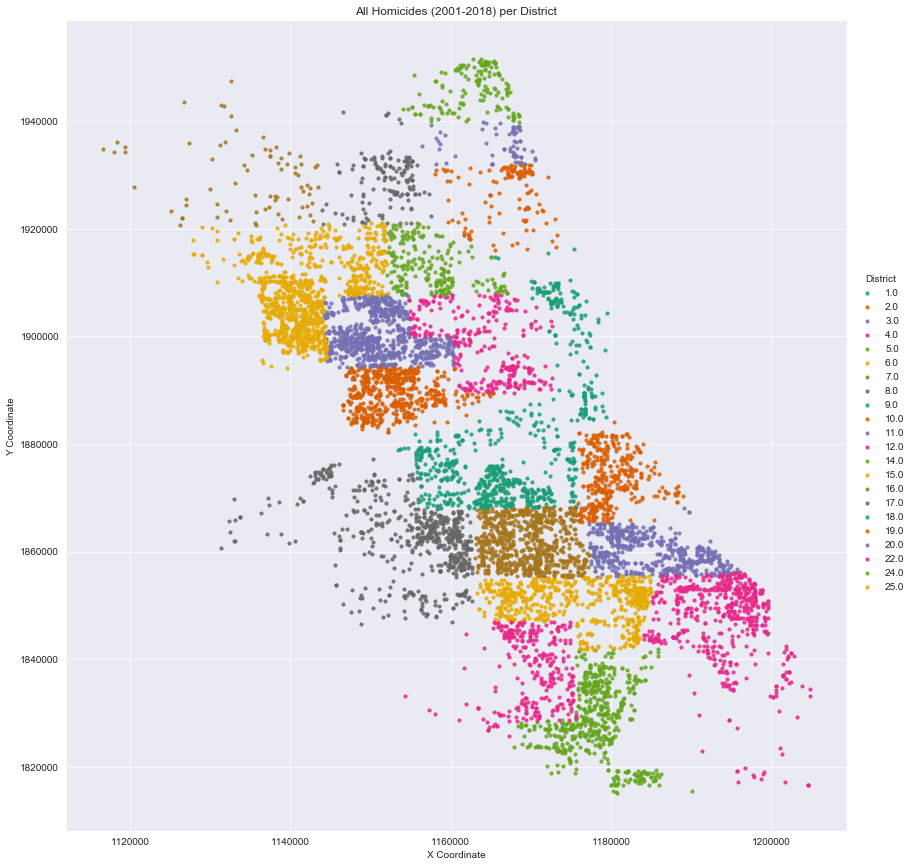

In [17]:
# plot all homicides in dataset by location per District
df_homicide = df_homicide.loc[(df_homicide['X Coordinate']!=0)]
sns.lmplot('X Coordinate',
           'Y Coordinate',
           data=df_homicide[:],
           fit_reg=False, 
           hue="District", 
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10}) 
ax = plt.gca()
ax.set_title("All Homicides (2001-2018) per District")

Text(0.5,1,'CHICAGO MURDER RATES: 2001 - 2018')

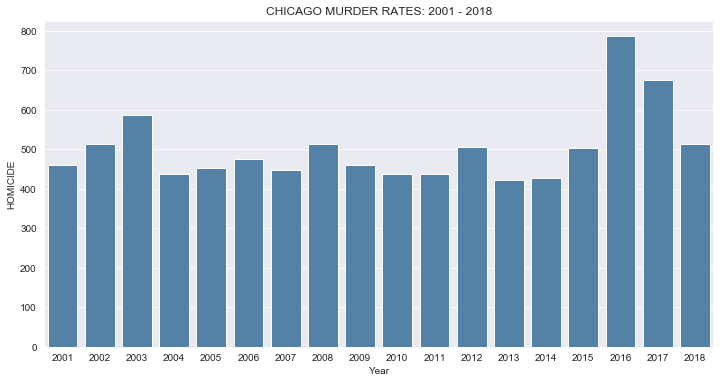

In [18]:
# plot bar chart of homicide rates for all years
plt.figure(figsize=(12,6))
sns.barplot(x='Year',
            y='HOMICIDE',
            data=df_homicide.groupby(['Year'])['Primary Type'].value_counts().\
                 unstack().reset_index(),
            color='steelblue').\
            set_title("CHICAGO MURDER RATES: 2001 - 2018")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


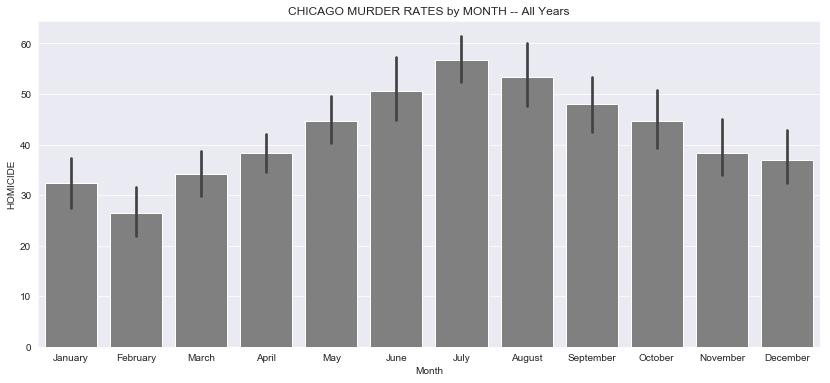

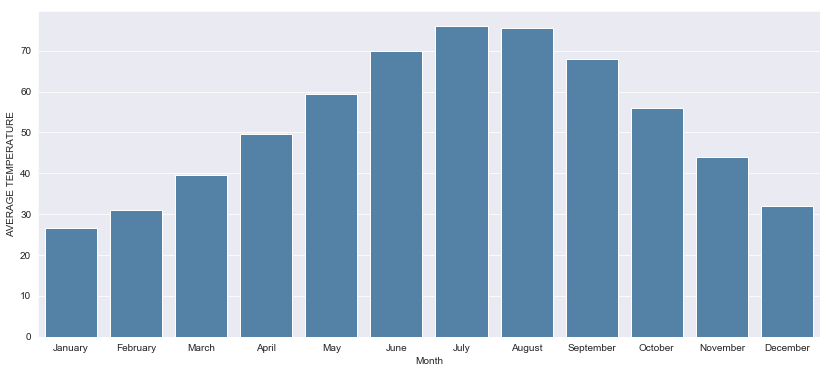

In [19]:
# plot homicides sorted by month
fig, ax = plt.subplots(figsize=(14,6))
month_nms = ['January','February','March','April','May','June','July','August'\
             ,'September','October','November','December']    
fig = sns.barplot(x='Month',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','Month'])['Primary Type'].\
                  value_counts().unstack().reset_index(),
                  color='#808080')
ax.set_xticklabels(month_nms)
plt.title("CHICAGO MURDER RATES by MONTH -- All Years")
# -------------------------------------------
# plot average monthly temps in Chicago
# source of data:  ncdc.noaa.gov
mntemp = [26.5,31,39.5,49.5,59.5,70,76,75.5,68,56,44,32]
df_temps = pd.DataFrame(list(zip(month_nms,mntemp)),
                       columns=['Month','AVERAGE TEMPERATURE'])
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='Month', y='AVERAGE TEMPERATURE', data=df_temps,color='steelblue')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'HOMICIDE BY DAY OF THE WEEK -- All Years')

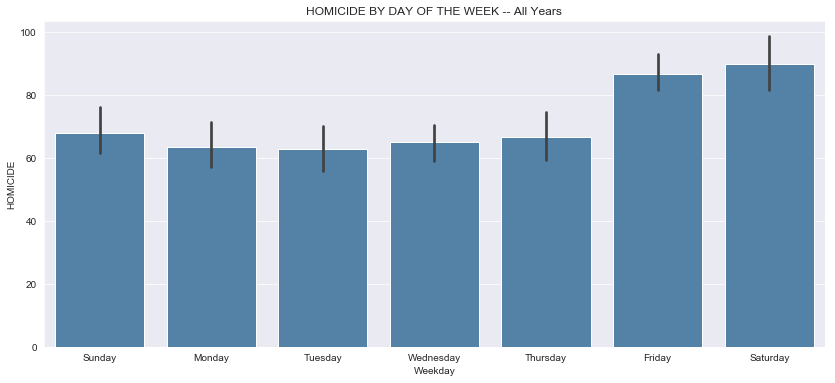

In [20]:
# plot homicide rates vs. day of the week
fig, ax = plt.subplots(figsize=(14,6))
week_days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']    
fig = sns.barplot(x='Weekday',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','Weekday'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='steelblue')
ax.set_xticklabels(week_days)
plt.title('HOMICIDE BY DAY OF THE WEEK -- All Years')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'HOMICIDE BY HOUR OF THE DAY -- All Years')

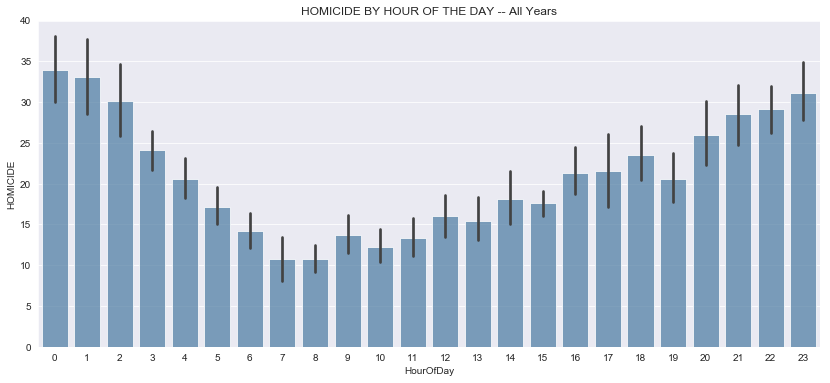

In [21]:
# use seaborn barplot to plot homicides vs. hour of the day 
fig, ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x='HourOfDay',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','HourOfDay'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='steelblue',
                  alpha=.75)
plt.title('HOMICIDE BY HOUR OF THE DAY -- All Years')

Text(0.5,1,'HOMICIDE - DOMESTIC STATS BY YEAR')

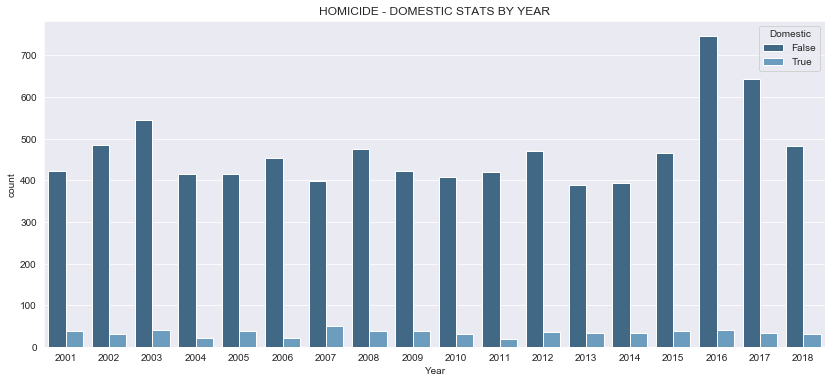

In [22]:
# plot domestic variable vs. homicide variable
fig, ax = plt.subplots(figsize=(14,6))
df_arrest = df_homicide[['Year','Domestic']]
ax = sns.countplot(x="Year",
                   hue='Domestic',
                   data=df_arrest,
                   palette="Blues_d")
plt.title('HOMICIDE - DOMESTIC STATS BY YEAR')

In [23]:
# visualize the "scene of the crime" vs. number of occurences at such scene
crime_scene = df_homicide['Primary Type'].\
            groupby(df_homicide['Location Description']).\
            value_counts().\
            unstack().\
            sort_values('HOMICIDE',ascending=False).\
            reset_index()
    
# Top Homicide Crime Scene Locations
crime_scene.head(10)

Primary Type,Location Description,HOMICIDE
0,STREET,4417
1,AUTO,1063
2,APARTMENT,768
3,ALLEY,581
4,HOUSE,497
5,PORCH,275
6,YARD,200
7,PARKING LOT,150
8,PARK PROPERTY,104
9,VACANT LOT,91


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,1,'CRIME SCENE BY LOCATION FREQUENCY')

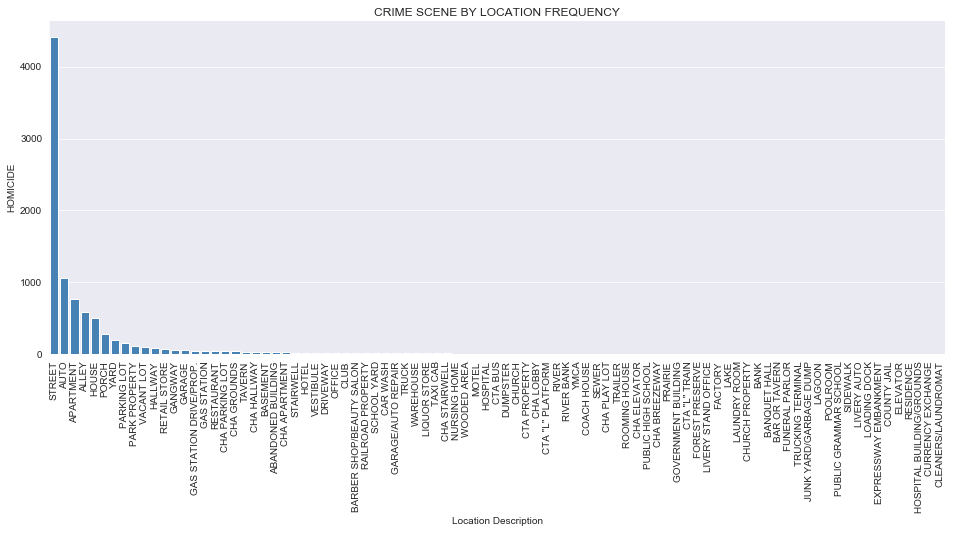

In [24]:
# create a count plot for all crime scene locations
g = sns.factorplot(x='Location Description',
                   y='HOMICIDE',
                   data=crime_scene,
                   kind='bar',
                   size=10,
                   color='steelblue', 
                   saturation=10)
g.fig.set_size_inches(15,5)
g.set_xticklabels(rotation=90)
plt.title('CRIME SCENE BY LOCATION FREQUENCY')

Text(0.5,1,'HOMICIDE vs DISTRICT vs YEAR')

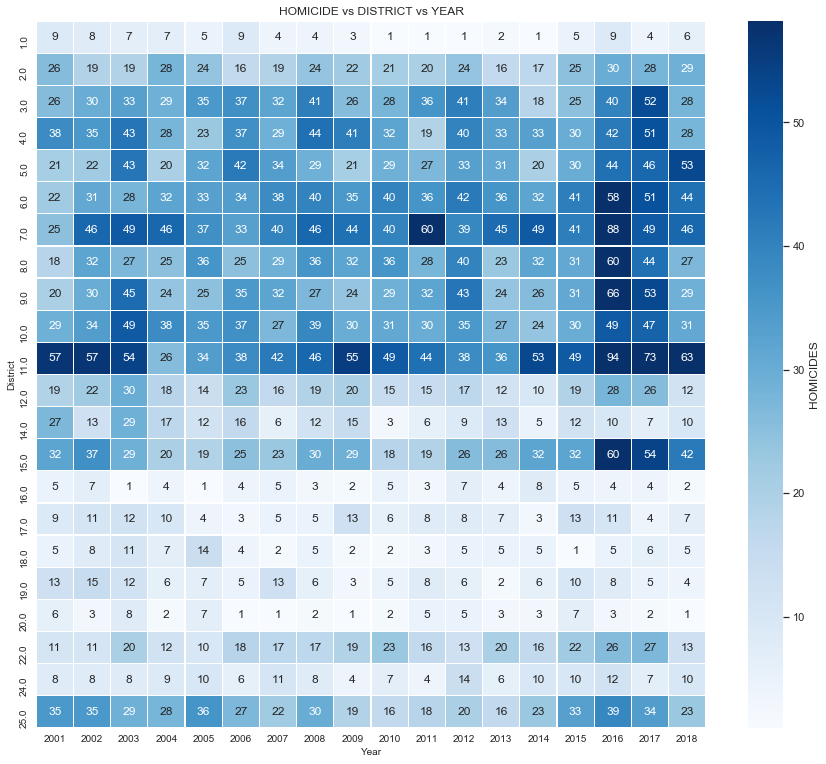

In [25]:
# create a heatmap showing crime by district by year
corr = df_homicide.groupby(['District','Year']).count().Date.unstack()
fig, ax = plt.subplots(figsize=(15,13))
sns.set(font_scale=1.0)
sns.heatmap(corr.dropna(axis=1),
            annot=True,
           linewidths=0.2,
           cmap='Blues',
            robust=True,
           cbar_kws={'label': 'HOMICIDES'})
plt.title('HOMICIDE vs DISTRICT vs YEAR')

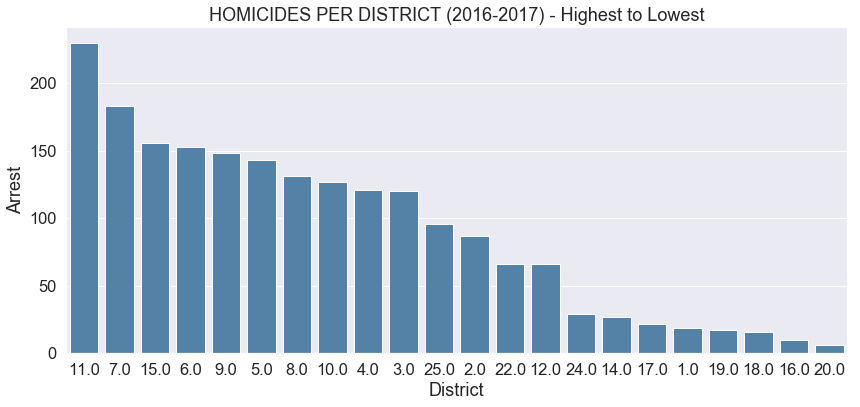

In [26]:
with sns.plotting_context('notebook',font_scale=1.5):
    sorted_homicides = df_homicide[df_homicide['Year']>=2016].groupby(['District']).count()\
                    .Arrest.reset_index().sort_values('Arrest',ascending=False)
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x='District',
                y='Arrest',
                data=sorted_homicides,
                color='steelblue',
                order = list(sorted_homicides['District']),
                label='big')
    plt.title('HOMICIDES PER DISTRICT (2016-2017) - Highest to Lowest')

Text(0.5,1,'HOMICIDE - ARRESTS STATS BY YEAR')

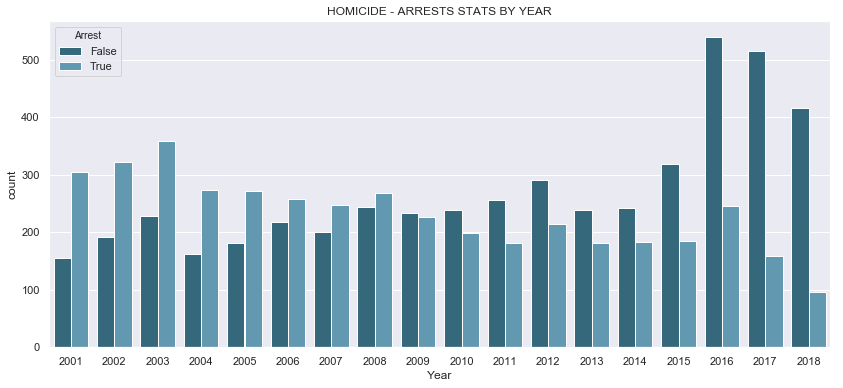

In [27]:
# create seaborn countplots  for whole dataset
fig, ax = plt.subplots(figsize=(14,6))
df_arrest = df_homicide[['Year','Arrest']]
ax = sns.countplot(x="Year",
                   hue='Arrest',
                   data=df_arrest,
                   palette="PuBuGn_d")
plt.title('HOMICIDE - ARRESTS STATS BY YEAR')

Text(0.5,1,'HOMICIDE - ARRESTS STATS BY MONTH -- (2016-2018)')

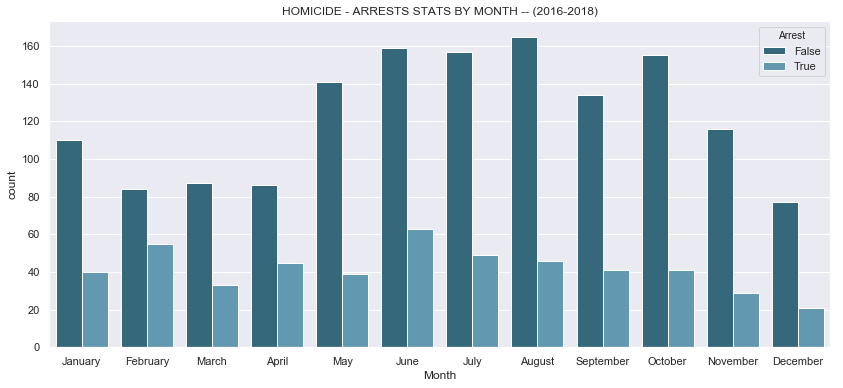

In [28]:
# create seaborn countplots for 2016 and 2017 -- high crime rate spike years
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.countplot(x="Month",
                   hue='Arrest',
                   data=df_homicide[df_homicide['Year']>=2016][['Month','Arrest']],
                   palette="PuBuGn_d")
month_nms = ['January','February','March','April','May','June','July',\
             'August','September','October','November','December']    
ax.set_xticklabels(month_nms)
plt.title('HOMICIDE - ARRESTS STATS BY MONTH -- (2016-2018)')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


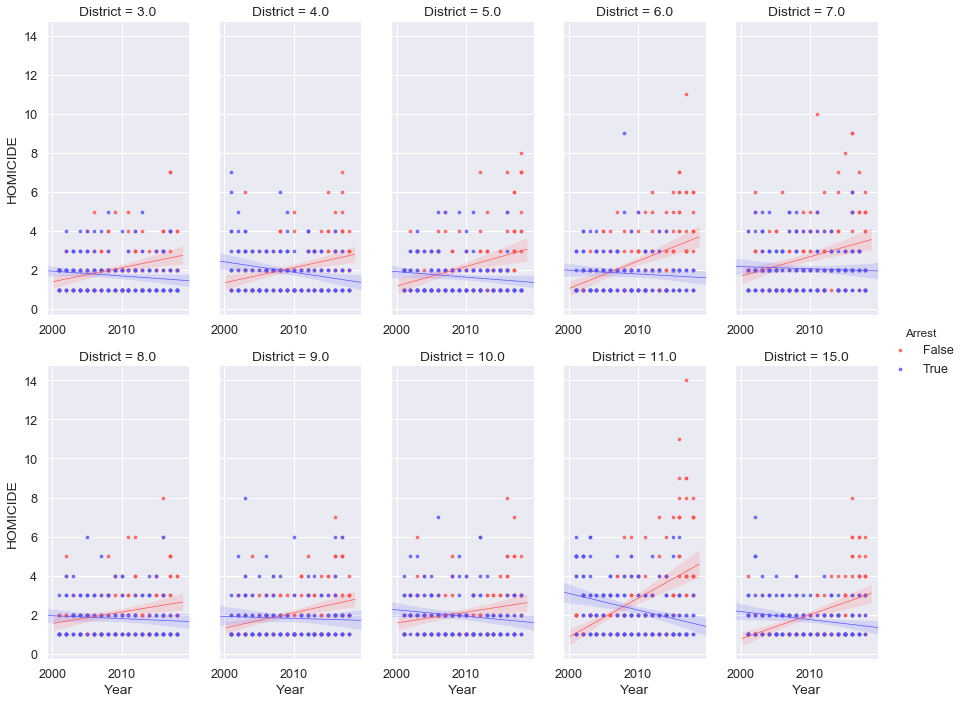

In [29]:
# create seaborn lmplot to compare arrest rates for different districts
dfx = df_homicide[df_homicide['District'].\
                isin(list(sorted_homicides.head(10)['District']))].\
                groupby(['District','Year','Month','Arrest'])['Primary Type'].\
                value_counts().unstack().reset_index()
with sns.plotting_context('notebook',font_scale=1.25):
    sns.set_context("notebook", font_scale=1.15)
    g = sns.lmplot('Year','HOMICIDE',
                   col='District',
                   col_wrap=5,
                   size=5,
                   aspect=0.5,
                   sharex=False,
                   data=dfx[:],
                   fit_reg=True,
                   hue="Arrest", 
                   palette=sns.color_palette("seismic_r", 2),
                   scatter_kws={"marker": "o",
                            "s": 7},
                   line_kws={"lw":0.7})

In [31]:
# plot chloropleth maps 2001 - 2017
def toString(x):
    return str(int(x))
df_homicide_allyears = df_homicide.groupby(['District']).count().Arrest.reset_index()
df_homicide_allyears['District'] = df_homicide_allyears['District'].apply(toString)
# ______________________________________________________#
chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)
m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_allyears,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Choropleth of Homicide per Police District : 2001-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map1.html") 
IFrame('map1.html', width=990, height=700)
# plot 2016-2018 chloropleth map
# code for second map is available on github

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [34]:
# plot chloropleth maps for all full years in dataset

def toString(x):
    return str(int(x))

df_homicide_allyears = df_homicide.groupby(['District']).count().Arrest.reset_index()
df_homicide_allyears['District'] = df_homicide_allyears['District'].apply(toString)

# ______________________________________________________#

chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_allyears,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Choropleth of Homicide per Police District : 2001-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map1.html") 
IFrame('map1.html', width=990, height=700)

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [35]:
# plot 2016-2018 chloropleth map

def toString(x):
    return str(int(x))

df_homicide_after_2015 = df_homicide[df_homicide['Year']>=2016].groupby(['District']).count().Arrest.reset_index()
df_homicide_after_2015['District'] = df_homicide_after_2015['District'].apply(toString)

# ______________________________________________________#

chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicide per Police District : 2016-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map2.html") 
IFrame('map2.html', width=990, height=700)

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [36]:
# plot heatmap all districts -- (2016-2018)

after_2015_geo = []
for index, row in df_homicide[df_homicide['Year']>=2016][['Latitude','Longitude','District']].dropna().iterrows():
    after_2015_geo.append([row["Latitude"], row["Longitude"],row['District']])
# _______________________________________________________________________

chicago = location=[41.85, -87.68]
m = folium.Map(chicago, zoom_start=9.5,control_scale = False)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='HeatMap Homicides : 2016-2017',
    highlight=True
    )
m.add_child(plugins.HeatMap(after_2015_geo,
                            name='all_homicides_2016_to_2017',
                            radius=5,
                            max_zoom=1,
                            blur=10, 
                            max_val=3.0))
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map3.html") 
IFrame('map3.html', width=990, height=700)

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [37]:
# plot yearly time lapse heatmap all districts -- (2001-2017)

chicago = location=[41.85, -87.68]
m = folium.Map(chicago, zoom_start=9.5,control_scale = False)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)
   
m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_allyears,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.2, 
    line_opacity=0.2,
    legend_name='Homicides : 2001-2017',
    highlight=True
    )

heat_df = df_homicide[df_homicide['Year']>=2001].reset_index()
heat_df = heat_df[['Latitude', 'Longitude','Year']]
heat_df['Weight'] = heat_df['Year'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude', 'Weight'])
heat_data = [[[row['Latitude'],row['Longitude']] for index, row in\
            heat_df[heat_df.Weight == i].iterrows()] for i in range(2001,2018)]

m.add_child(plugins.HeatMapWithTime(data=heat_data,
                                   auto_play=True,
                                   max_opacity=0.8,
                                   display_index=True,
                                   radius=9,
                                   name='HeatMapWithTime')
           )

folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map4.html") 
IFrame('map4.html', width=990, height=700)

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [38]:
# geo locations of homicides crime scenes -- 2016-2017

df_homicide_after_2015 = df_homicide[df_homicide['Year']>=2016].groupby(['District']).count().Arrest.reset_index()
df_homicide_after_2015['District'] = df_homicide_after_2015['District'].apply(toString)

after_2015 = df_homicide[df_homicide['Year']>=2016].dropna()

# _____________________________________________

lats = list(after_2015.Latitude)
longs = list(after_2015.Longitude)
locations = [lats,longs]

m = folium.Map(
    location=[np.mean(lats), np.mean(longs)],
    zoom_start=10.3
)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

FastMarkerCluster(data=list(zip(lats, longs))).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicides : 2016-2017',
    highlight=False
    )

# folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map5.html") 
IFrame('map5.html', width=990, height=700)

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [40]:
# geo locations of homicides -- January, February 2018

df_homicide_2018 = df_homicide[df_homicide['Year']==2018].groupby(['District']).count().Arrest.reset_index()
df_homicide_2018['District'] = df_homicide_2018['District'].apply(toString)

only_2018 = df_homicide[df_homicide['Year']==2018].dropna()

# _____________________________________________

lats = list(only_2018.Latitude)
longs = list(only_2018.Longitude)
locations = [lats,longs]

m = folium.Map(
    location=[np.mean(lats), np.mean(longs)],
    zoom_start=10.3
)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

FastMarkerCluster(data=list(zip(lats, longs))).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_2018,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicides : January, February 2018',
    highlight=False
    )

# folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map6.html") 
IFrame('map6.html', width=990, height=700)

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## Part 3: Individual Inferences
Make *any* visualization to show an inference that you can make about the dataset that is not covered in the lab itself. Remember since it is a guided lab - this part might be the only thing that would make a difference in the marks! You can even go beyond Homicide rates and pick up - instead - any other crime that is not covered in the lab.

Primary type: Gambling /n
Districts 11 15 and 7 had the highest gambling rates. Gambling was prevalent from 2004 to 2012 with 2006-2007 having the highest rates. Gambling is common in the summer months, with daily rates having no difference. Police arrests were being made regularly and hence gambling is now on an alltime low.

In [81]:
# create and preview dataframe containing crimes associated with gang violence

col2 = ['Date','Primary Type','Arrest','Domestic','District','X Coordinate','Y Coordinate']
multiple_crimes = crime_data[col2]
multiple_crimes = multiple_crimes[multiple_crimes['Primary Type']\
                  .isin(['HUMAN TRAFFICKING','CRIM SEXUAL ASSAULT','GAMBLING','PROSTITUTION'])]

# clean some rouge (0,0) coordinates
multiple_crimes = multiple_crimes[multiple_crimes['X Coordinate']!=0]


multiple_crimes.head()

,Date,Primary Type,Arrest,Domestic,District,X Coordinate,Y Coordinate
37,03/18/2015 11:35:00 PM,CRIM SEXUAL ASSAULT,False,False,4.0,1192651.0,1842233.0
56,03/18/2015 02:30:00 PM,CRIM SEXUAL ASSAULT,False,False,18.0,1173852.0,1913957.0
253,03/19/2015 06:00:00 AM,CRIM SEXUAL ASSAULT,False,False,1.0,1173362.0,1893147.0
350,03/18/2015 11:20:00 PM,PROSTITUTION,True,False,18.0,1178513.0,1904263.0
351,03/18/2015 09:30:00 PM,PROSTITUTION,True,False,18.0,1178513.0,1904263.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


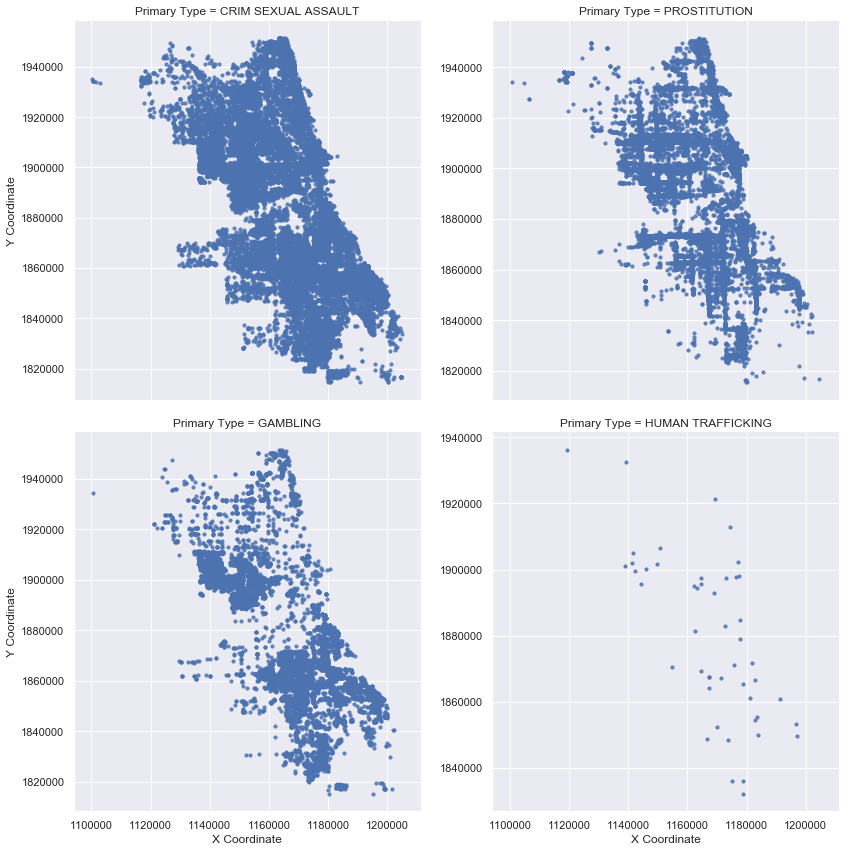

In [82]:
# geographical distribution scatter plots by crime
g = sns.lmplot(x="X Coordinate",
               y="Y Coordinate",
               col="Primary Type",
               data=multiple_crimes.dropna(), 
               col_wrap=2, size=6, fit_reg=False, 
               sharey=False,
               scatter_kws={"marker": "D",
                            "s": 10})

In [83]:
# create a dataframe with Homicide as the only crime

df_homicideN = crime_data[crime_data['Primary Type']=='GAMBLING']
df_homicideN.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1018,10002677,HY191890,03/20/2015 01:13:00 PM,020XX W 70TH ST,1661,GAMBLING,GAME/DICE,STREET,True,False,...,17.0,67.0,19,1164027.0,1858234.0,2015,02/10/2018 03:50:01 PM,41.766615,-87.674337,"(41.766615006, -87.674337321)"
1866,10003802,HY193541,03/21/2015 06:45:00 PM,042XX W MONROE ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,26.0,19,1148136.0,1899324.0,2015,02/10/2018 03:50:01 PM,41.879691,-87.731530,"(41.879691121, -87.731529667)"
1973,10003937,HY193663,03/21/2015 07:55:00 PM,032XX W LAWRENCE AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,SMALL RETAIL STORE,True,False,...,39.0,14.0,19,1154071.0,1931710.0,2015,02/10/2018 03:50:01 PM,41.968445,-87.708871,"(41.968444682, -87.708871059)"
2353,10004429,HY194332,03/22/2015 01:57:00 PM,019XX S ST LOUIS AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,24.0,29.0,19,1153407.0,1890195.0,2015,02/10/2018 03:50:01 PM,41.854537,-87.712418,"(41.854537081, -87.71241763)"
3053,10005837,HY195964,03/23/2015 08:40:00 PM,039XX W CERMAK RD,1661,GAMBLING,GAME/DICE,PARKING LOT/GARAGE(NON.RESID.),True,False,...,24.0,29.0,19,1150290.0,1889088.0,2015,02/10/2018 03:50:01 PM,41.851561,-87.723887,"(41.851560618, -87.723887245)"


In [84]:
# print some attributes of our new homicide dataframe

df_homicideN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14424 entries, 1018 to 6748085
Data columns (total 22 columns):
ID                      14424 non-null int64
Case Number             14424 non-null object
Date                    14424 non-null object
Block                   14424 non-null object
IUCR                    14424 non-null object
Primary Type            14424 non-null object
Description             14424 non-null object
Location Description    14424 non-null object
Arrest                  14424 non-null bool
Domestic                14424 non-null bool
Beat                    14424 non-null int64
District                14424 non-null float64
Ward                    13300 non-null float64
Community Area          13300 non-null float64
FBI Code                14424 non-null object
X Coordinate            14326 non-null float64
Y Coordinate            14326 non-null float64
Year                    14424 non-null int64
Updated On              14424 non-null object
Latitude      

In [85]:
# find null values in our dataframe

df_homicideN.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       0
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                    1124
Community Area          1124
FBI Code                   0
X Coordinate              98
Y Coordinate              98
Year                       0
Updated On                 0
Latitude                  98
Longitude                 98
Location                  98
dtype: int64

In [86]:
# drop null values and confirm

df_homicide = df_homicideN.dropna()
df_homicide.isnull().sum().sum()

0

In [87]:
# create a list of columns to keep and update the dataframe with new columns

keep_cols = ['Year','Date','Primary Type','Arrest','Domestic','District','Location Description',
             'FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude','Location']

df_homicide = df_homicide[keep_cols].reset_index()
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,1018,2015,03/20/2015 01:13:00 PM,GAMBLING,True,False,7.0,STREET,19,1164027.0,1858234.0,41.766615,-87.674337,"(41.766615006, -87.674337321)"
1,1866,2015,03/21/2015 06:45:00 PM,GAMBLING,True,False,11.0,SIDEWALK,19,1148136.0,1899324.0,41.879691,-87.731530,"(41.879691121, -87.731529667)"
2,1973,2015,03/21/2015 07:55:00 PM,GAMBLING,True,False,17.0,SMALL RETAIL STORE,19,1154071.0,1931710.0,41.968445,-87.708871,"(41.968444682, -87.708871059)"
3,2353,2015,03/22/2015 01:57:00 PM,GAMBLING,True,False,10.0,SIDEWALK,19,1153407.0,1890195.0,41.854537,-87.712418,"(41.854537081, -87.71241763)"
4,3053,2015,03/23/2015 08:40:00 PM,GAMBLING,True,False,10.0,PARKING LOT/GARAGE(NON.RESID.),19,1150290.0,1889088.0,41.851561,-87.723887,"(41.851560618, -87.723887245)"


In [88]:
# change string Date to datetime.datetime format

df_homicide['Date'] = df_homicide['Date'].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,1018,2015,2015-03-20 13:13:00,GAMBLING,True,False,7.0,STREET,19,1164027.0,1858234.0,41.766615,-87.674337,"(41.766615006, -87.674337321)"
1,1866,2015,2015-03-21 18:45:00,GAMBLING,True,False,11.0,SIDEWALK,19,1148136.0,1899324.0,41.879691,-87.731530,"(41.879691121, -87.731529667)"
2,1973,2015,2015-03-21 19:55:00,GAMBLING,True,False,17.0,SMALL RETAIL STORE,19,1154071.0,1931710.0,41.968445,-87.708871,"(41.968444682, -87.708871059)"
3,2353,2015,2015-03-22 13:57:00,GAMBLING,True,False,10.0,SIDEWALK,19,1153407.0,1890195.0,41.854537,-87.712418,"(41.854537081, -87.71241763)"
4,3053,2015,2015-03-23 20:40:00,GAMBLING,True,False,10.0,PARKING LOT/GARAGE(NON.RESID.),19,1150290.0,1889088.0,41.851561,-87.723887,"(41.851560618, -87.723887245)"


In [89]:
# create new columns from date column -- Year, Month, Day, Hour, Minutes, DayOfWeek 

df_homicide['Year'] = df_homicide['Date'].dt.year
df_homicide['Month'] = df_homicide['Date'].dt.month
df_homicide['Day'] = df_homicide['Date'].dt.day
df_homicide['Weekday'] = df_homicide['Date'].dt.dayofweek
df_homicide['HourOfDay'] = df_homicide['Date'].dt.hour

df_homicide = df_homicide.sort_values('Date')
# print columns list and info

df_homicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13211 entries, 3223 to 13209
Data columns (total 18 columns):
index                   13211 non-null int64
Year                    13211 non-null int64
Date                    13211 non-null datetime64[ns]
Primary Type            13211 non-null object
Arrest                  13211 non-null bool
Domestic                13211 non-null bool
District                13211 non-null float64
Location Description    13211 non-null object
FBI Code                13211 non-null object
X Coordinate            13211 non-null float64
Y Coordinate            13211 non-null float64
Latitude                13211 non-null float64
Longitude               13211 non-null float64
Location                13211 non-null object
Month                   13211 non-null int64
Day                     13211 non-null int64
Weekday                 13211 non-null int64
HourOfDay               13211 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(6),

In [90]:
# save cleaned data to pickle file 
df_homicide.to_pickle('df_homicide.pkl') 
print('pickle size:', os.stat('df_homicide.pkl').st_size)
# load pickled data 
df_homicide = pd.read_pickle('df_homicide.pkl')

pickle size: 2019755


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,1,'All Homicides (2001-2018) per District')

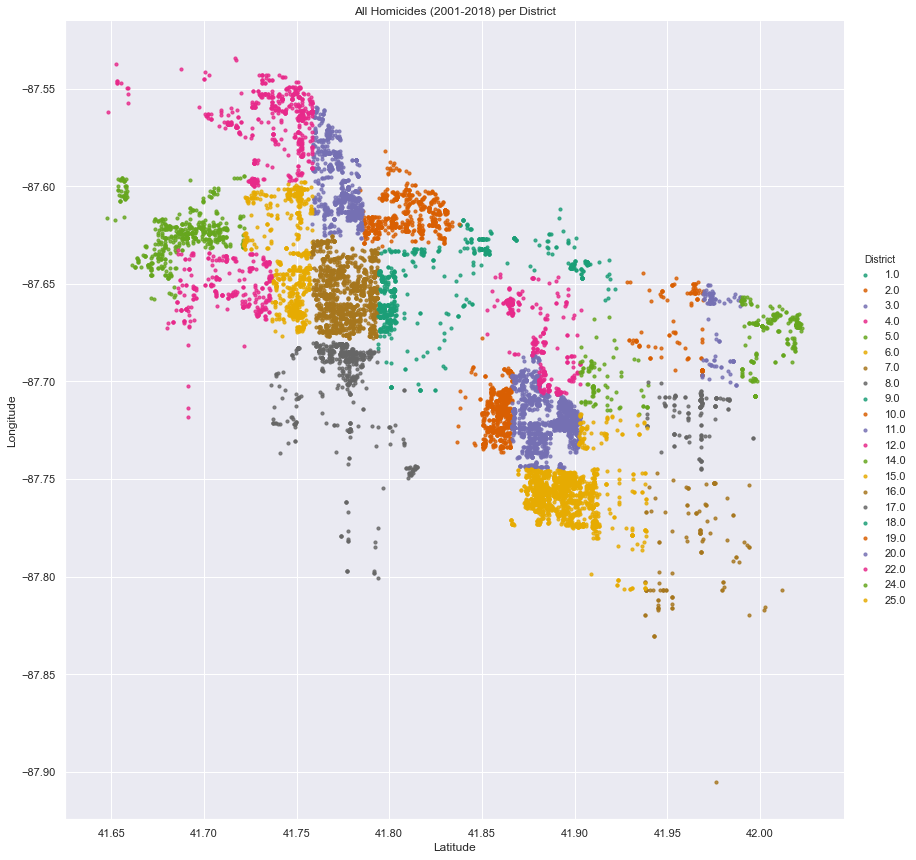

In [92]:
# plot all homicides in dataset by location per District
df_homicide = df_homicide.loc[(df_homicide['Latitude']!=0)]
sns.lmplot('Latitude',
           'Longitude',
           data=df_homicide[:],
           fit_reg=False, 
           hue="District", 
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10}) 
ax = plt.gca()
ax.set_title("All Homicides (2001-2018) per District")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'HOMICIDE BY DAY OF THE WEEK -- All Years')

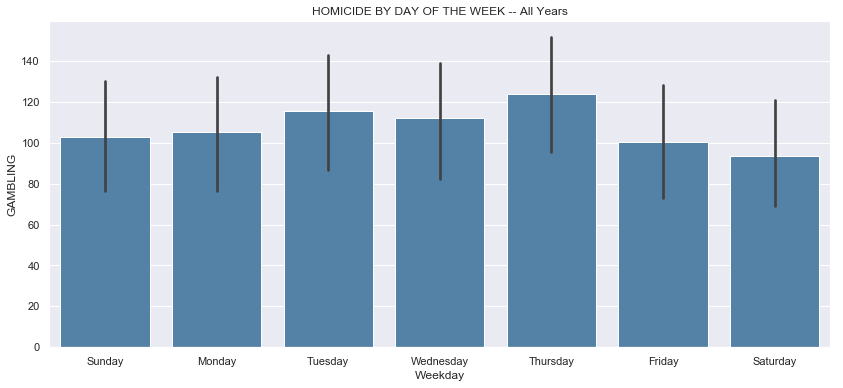

In [94]:
# plot homicide rates vs. day of the week
fig, ax = plt.subplots(figsize=(14,6))
week_days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']    
fig = sns.barplot(x='Weekday',
                  y='GAMBLING',
                  data=df_homicide.groupby(['Year','Weekday'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='steelblue')
ax.set_xticklabels(week_days)
plt.title('HOMICIDE BY DAY OF THE WEEK -- All Years')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


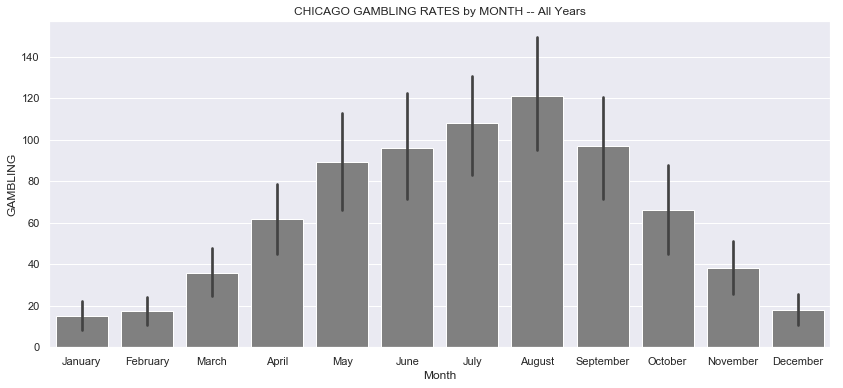

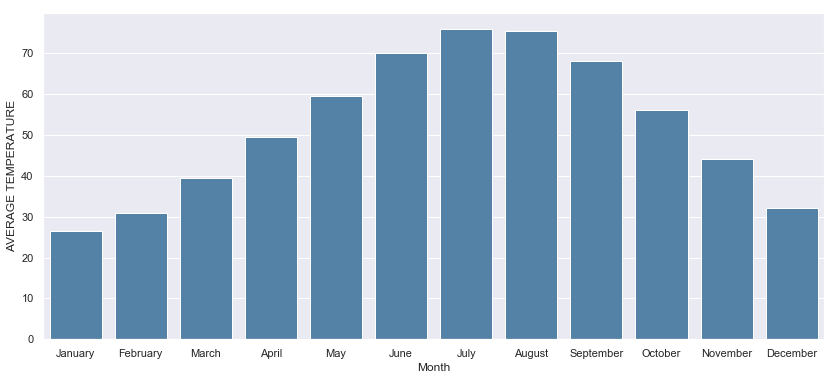

In [95]:
# plot homicides sorted by month
fig, ax = plt.subplots(figsize=(14,6))
month_nms = ['January','February','March','April','May','June','July','August'\
             ,'September','October','November','December']    
fig = sns.barplot(x='Month',
                  y='GAMBLING',
                  data=df_homicide.groupby(['Year','Month'])['Primary Type'].\
                  value_counts().unstack().reset_index(),
                  color='#808080')
ax.set_xticklabels(month_nms)
plt.title("CHICAGO GAMBLING RATES by MONTH -- All Years")
# -------------------------------------------
# plot average monthly temps in Chicago
# source of data:  ncdc.noaa.gov
mntemp = [26.5,31,39.5,49.5,59.5,70,76,75.5,68,56,44,32]
df_temps = pd.DataFrame(list(zip(month_nms,mntemp)),
                       columns=['Month','AVERAGE TEMPERATURE'])
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='Month', y='AVERAGE TEMPERATURE', data=df_temps,color='steelblue')

Text(0.5,1,'CHICAGO GAMBLING RATES')

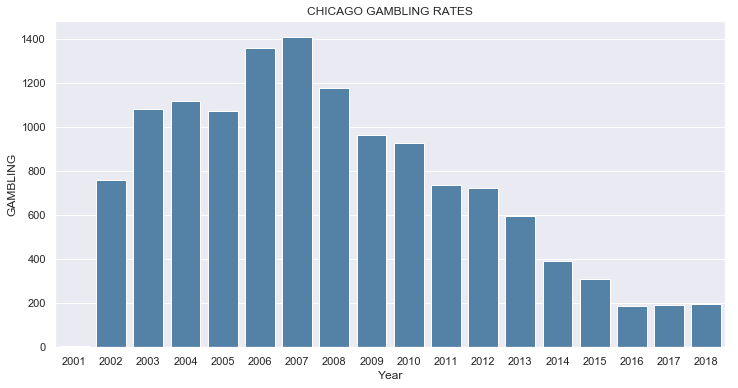

In [96]:
# plot bar chart of homicide rates for all years
plt.figure(figsize=(12,6))
sns.barplot(x='Year',
            y='GAMBLING',
            data=df_homicide.groupby(['Year'])['Primary Type'].value_counts().\
                 unstack().reset_index(),
            color='steelblue').\
            set_title("CHICAGO GAMBLING RATES")

Text(0.5,1,'GAMBLING - ARREST STATS BY Districts')

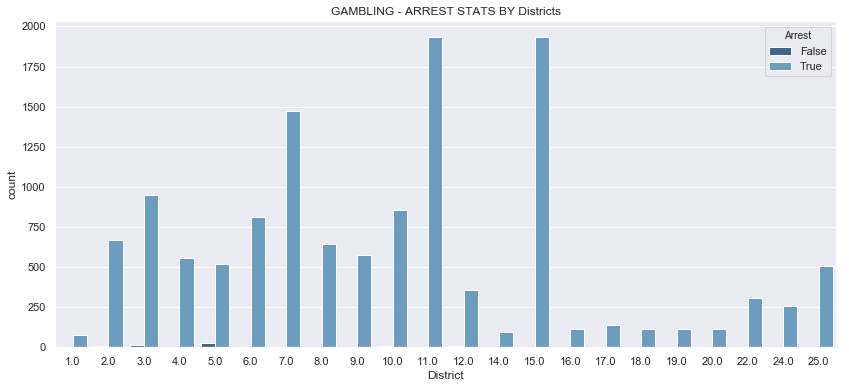

In [102]:
# plot Arrest variable vs. homicide variable
fig, ax = plt.subplots(figsize=(14,6))
df_arrest = df_homicide[['District','Arrest']]
ax = sns.countplot(x="District",
                   hue='Arrest',
                   data=df_arrest,
                   palette="Blues_d")
plt.title('GAMBLING - ARREST STATS BY Districts')

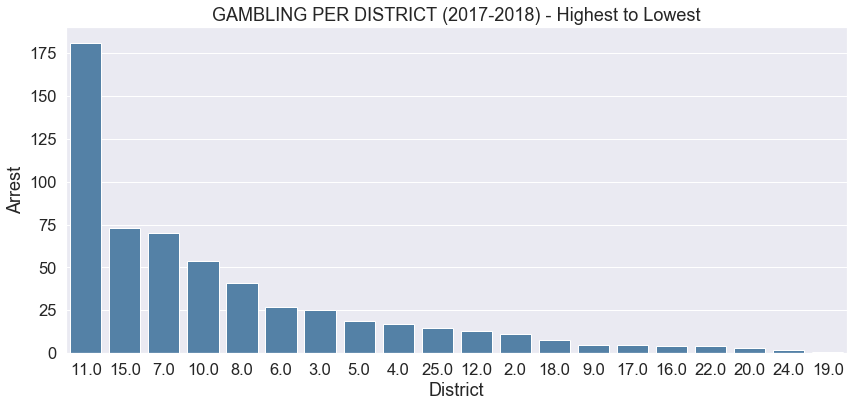

In [107]:
with sns.plotting_context('notebook',font_scale=1.5):
    sorted_homicides = df_homicide[df_homicide['Year']>=2016].groupby(['District']).count()\
                    .Arrest.reset_index().sort_values('Arrest',ascending=False)
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x='District',
                y='Arrest',
                data=sorted_homicides,
                color='steelblue',
                order = list(sorted_homicides['District']),
                label='big')
    plt.title('GAMBLING PER DISTRICT (2017-2018) - Highest to Lowest')

Text(0.5,1,'GAMBLING - ARRESTS STATS BY MONTH -- (2016-2018)')

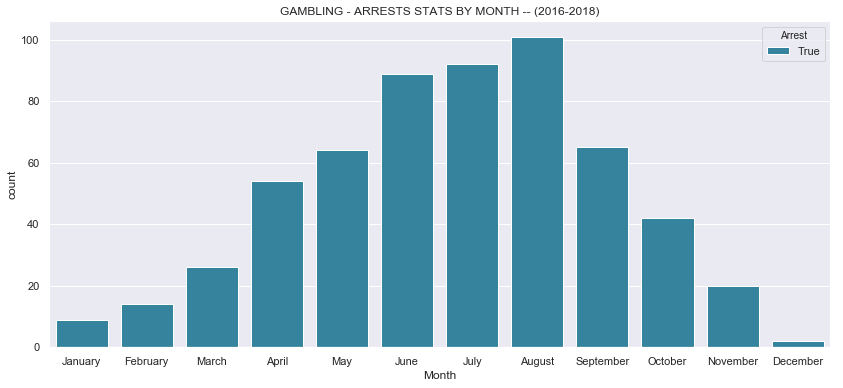

In [105]:
# create seaborn countplots for 2016 and 2017 -- high crime rate spike years
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.countplot(x="Month",
                   hue='Arrest',
                   data=df_homicide[df_homicide['Year']>=2016][['Month','Arrest']],
                   palette="PuBuGn_d")
month_nms = ['January','February','March','April','May','June','July',\
             'August','September','October','November','December']    
ax.set_xticklabels(month_nms)
plt.title('GAMBLING - ARRESTS STATS BY MONTH -- (2016-2018)')


In [106]:
# plot chloropleth maps 2001 - 2017
def toString(x):
    return str(int(x))
df_homicide_allyears = df_homicide.groupby(['District']).count().Arrest.reset_index()
df_homicide_allyears['District'] = df_homicide_allyears['District'].apply(toString)
# ______________________________________________________#
chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)
m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_allyears,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Choropleth of Gambling per Police District : 2001-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map1.html") 
IFrame('map1.html', width=990, height=700)

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
